In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [17]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [18]:
df.shape

(29922, 6)

In [19]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

1. Change ordered_at to datetime

2. Change price and line_total to float

In [20]:
df["ordered_at"] = pd.to_datetime(df["ordered_at"])


In [21]:

for column in ['price', 'line_total']:
    df[column] = df[column].apply(lambda x: float(x[1:]))

In [22]:
df.dtypes
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5


#### TODO: drop if duplicated or null

In [23]:
df[df.duplicated()].shape[0]


538

In [24]:
df.drop_duplicates(inplace = True)


In [25]:
df.isnull().sum()

order_id         0
name          1481
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [26]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


In [27]:
df.dropna(inplace = True)

#### Sanity check for value ranges and to check assumptions

In [28]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [29]:
df[df['line_total'] < 0].shape[0]

279

#### TODO: 
1. Get rows with **line_total = price * quantity**

2. Then remove if line total < 0

In [30]:

df.loc[(df['price'] * df['quantity']) != df['line_total'], 'line_total'] = df['price'] * df['quantity']


In [31]:

df = df[df["line_total"] >= 0]

In [32]:
df.describe()

,order_id,ordered_at,price,quantity,line_total
count,27624.000000,27624,27624.000000,27624.000000,27624.000000
mean,14993.783051,2018-04-15 11:40:51.128764928,2.511711,2.000724,5.028743
min,10000.000000,2018-01-01 11:30:00,0.500000,1.000000,0.500000
25%,12501.750000,2018-02-23 05:11:56.249999872,1.500000,1.000000,2.500000
50%,14973.000000,2018-04-14 15:11:43,2.500000,2.000000,4.500000
75%,17507.000000,2018-06-07 00:48:22,3.500000,3.000000,7.500000
max,19999.000000,2018-07-28 18:51:57,4.000000,3.000000,12.000000
std,2888.516649,NaN,1.059244,0.819432,3.085410


#### TODO: Get value between "" in name and put it in category column by using .apply
E.g: "ICE CREAM" Peanut Fudge, here we want to extract the phrase "ICE CREAM", and put it in newly created column called **category**

In [33]:
# TODO
pattern = r'^"([A-Z ]+)" (.*)'
transform_func = lambda x: re.findall(pattern, x)[0]

df[['name', 'category']] = df['name'].apply(transform_func).apply(pd.Series)

In [34]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,ICE CREAM,2018-01-01 11:30:00,3.5,3,10.5,Peanut Fudge
1,10000,ICE CREAM,2018-01-01 11:30:00,3.5,1,3.5,Peanut Fudge
2,10001,SORBET,2018-01-01 12:14:54,2.5,2,5.0,Raspberry
4,10001,CONE,2018-01-01 12:14:54,3.5,1,3.5,Dipped Waffle Cone
5,10002,SORBET,2018-01-01 12:23:09,3.0,1,3.0,Lychee


#### Analysis, finally!

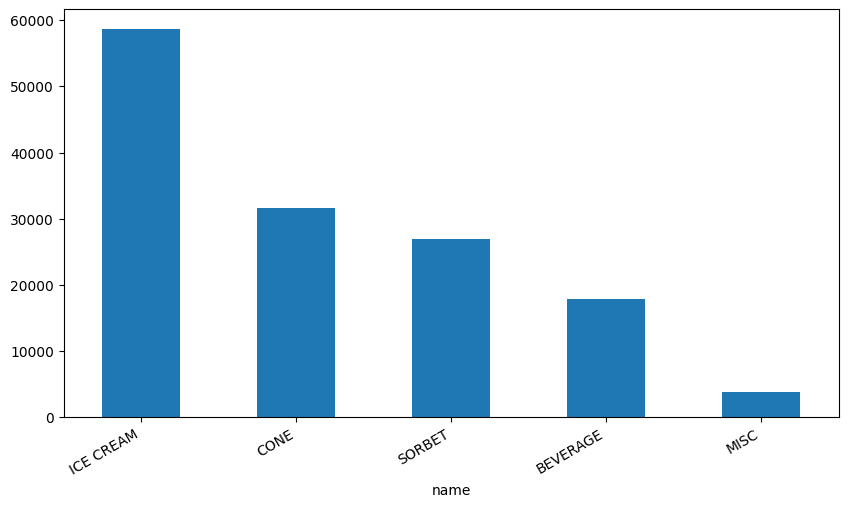

In [35]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()